# TCRD Target Visualizations

I am personally interested in the Targets that are in the Tdark stage that are on the brink of advancing because discovering things is much more exciting, so that will be the focus of this notebook.

In [1]:
# Importing what I will be using
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.style as style

targets = pd.read_pickle('Data/pharos_data')
generif = pd.read_pickle('Data/generif')
ortholog = pd.read_pickle('Data/ortholog')
pm_scores = pd.read_pickle('Data/pm_scores')
pt_scores = pd.read_pickle('Data/pt_scores')
ab_info = pd.read_pickle('Data/tdl_info')
goa = pd.read_pickle('Data/goa')
omim = pd.read_pickle('Data/omim')
hgram = pd.read_pickle('Data/hgram')

style.use('seaborn-poster')


The actual defined goals of the project are to find any Tdark targets that could be ready to achieve a new TDL level, and then potentially find new features that can also help indicate that a target is close to getting a new TDL level.

To start, I will try to find potential targets that are close to achieving a new TDL level via the defined requirements, and then compare those targets to each other to see if there are similar trends among those targets in the TCDR DB to see if I can find any new features which can also indicate a potential change in TDL level.

In [2]:
# Extracting only relevant information

targets = targets[targets['tdl'] == 'Tdark'].reset_index(drop=True)

pm_scores = pm_scores[pm_scores['protein_id'].isin(targets['id'])].reset_index(drop=True)
pt_scores = pt_scores[pt_scores['protein_id'].isin(targets['id'])].reset_index(drop=True)
generif = generif[generif['protein_id'].isin(targets['id'])].reset_index(drop=True)
ortholog = ortholog[ortholog['protein_id'].isin(targets['id'])].reset_index(drop=True)
ab_info = ab_info[ab_info['protein_id'].isin(targets['id'])].reset_index(drop=True)

I have filtered out all the data sets to only contain information on proteins that are Tdark, which will make it easier to compare and visualize

In [3]:
targets.head()

,id,name,ttype,description,comment,tdl,idg,fam,famext
0,2,Uncharacterized protein C7orf77,Single Protein,None,None,Tdark,0,None,None
1,3,Uncharacterized protein C8orf34,Single Protein,None,None,Tdark,0,None,None
2,5,Uncharacterized protein C8orf76,Single Protein,None,None,Tdark,0,None,None
3,10,Cyclic nucleotide-binding domain-containing pr...,Single Protein,None,None,Tdark,0,None,None
4,11,Cyclic nucleotide-binding domain-containing pr...,Single Protein,None,None,Tdark,0,None,None


In [4]:
pm_scores.head()

,id,protein_id,year,score
0,476,16473,2010,0.666667
1,477,16473,2012,0.800000
2,478,16473,2015,1.000000
3,479,16473,2019,0.033333
4,708,14553,2019,1.607143


In [5]:
pt_scores.head()

,id,protein_id,year,score
0,258,2594,2015,0.333333
1,259,2594,2016,0.166667
2,260,2594,2018,0.142857
3,261,9038,1974,1.000000
4,262,9038,1975,1.000000


In [6]:
generif.head()

,id,protein_id,pubmed_ids,text,years
0,68,5,20379614,Clinical trial of gene-disease association and...,None
1,109,10,20379614,Clinical trial of gene-disease association and...,None
2,110,10,18825932,Observational study of gene-disease associatio...,2008
3,111,12,20877624|16385451,Observational study of gene-disease associatio...,2010|2006
4,255,26,19864490,Consortin is a trans-Golgi network cargo recep...,2010


In [7]:
ortholog.head()

,id,protein_id,taxid,species,db_id,geneid,symbol,name,mod_url,sources
0,178771,3,9598,Chimp,VGNC:3030,464223.0,C8H8orf34,chromosome 8 C8orf34 homolog,None,"Inparanoid, OMA, EggNOG"
1,178772,3,9544,Macaque,None,705490.0,C8H8orf34,"chromosome 8 open reading frame, human C8orf34",None,"Inparanoid, OMA, EggNOG"
2,178773,3,10090,Mouse,MGI:2444149,320492.0,A830018L16Rik,RIKEN cDNA A830018L16 gene,http://www.informatics.jax.org/marker/MGI:2444149,"Inparanoid, OMA, EggNOG"
3,178774,3,10116,Rat,RGD:1564053,500390.0,RGD1564053,similar to hypothetical protein,http://rgd.mcw.edu/rgdweb/report/gene/main.htm...,"Inparanoid, OMA, EggNOG"
4,178775,3,9615,Dog,VGNC:52544,477905.0,C29H8orf34,chromosome 29 C8orf34 homolog,None,"Inparanoid, OMA, EggNOG"


In [8]:
ab_info.head()

,id,itype,target_id,protein_id,nucleic_acid_id,string_value,number_value,integer_value,date_value,boolean_value,curration_level
0,70692,Ab Count,None,2,None,None,None,0,None,None,None
1,70695,Ab Count,None,3,None,None,None,62,None,None,None
2,70701,Ab Count,None,5,None,None,None,68,None,None,None
3,70716,Ab Count,None,10,None,None,None,23,None,None,None
4,70719,Ab Count,None,11,None,None,None,45,None,None,None


In [9]:
# Combine data from separate data frames into one
targets['ab_count'] = ab_info.integer_value

# Looking at Tdark proteins

## Antibodies
I wonder how the antibody count is distributed among the different proteins

Text(0.5, 1.0, 'Distribution of Antibody Count Among Tdark Proteins')

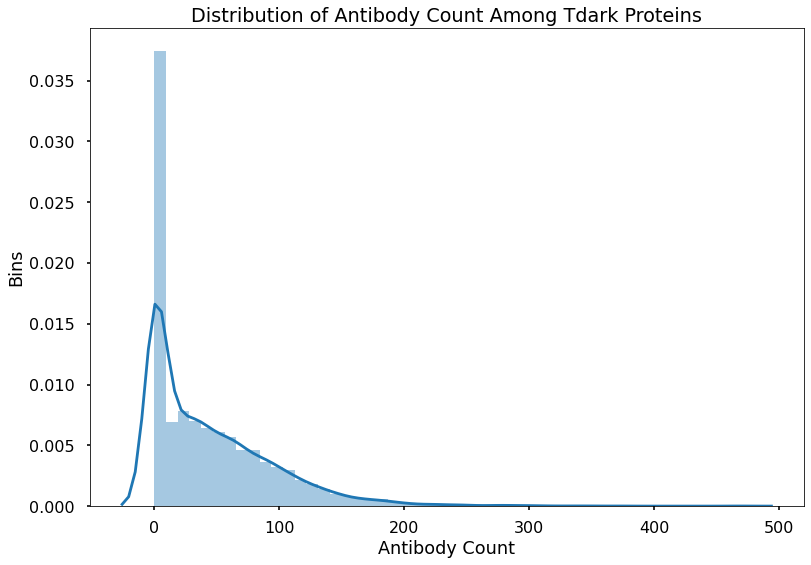

In [10]:
sns.distplot(targets['ab_count'])
plt.xlabel('Antibody Count')
plt.ylabel('Bins')
plt.title('Distribution of Antibody Count Among Tdark Proteins')

* Right Skewed as expected

In [11]:
ab_req = targets[targets['ab_count'] >= 50]

print('{:.2f}% of {} Tdark proteins have an antibody count over greater than or equal to 50'.format(len(ab_req)/len(targets)*100, len(targets)))

36.78% of 6368 Tdark proteins have an antibody count over greater than or equal to 50


# PM Scores

In [12]:
# Getting average PM Score for each protein
avg_score = {}

pm_group = pm_scores.groupby(['protein_id'])

for name, group in pm_group:
    avg_score[name] = group['score'].sum()

pm_proteins = targets[targets['id'].isin(avg_score.keys())]

pm_proteins['pm_score'] = avg_score.values()

pm_proteins

/home/jbofill/anaconda3/envs/pharos/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,id,name,ttype,description,comment,tdl,idg,fam,famext,ab_count,pm_score
1,3,Uncharacterized protein C8orf34,Single Protein,None,None,Tdark,0,None,None,62,4.437500
2,5,Uncharacterized protein C8orf76,Single Protein,None,None,Tdark,0,None,None,68,0.944444
3,10,Cyclic nucleotide-binding domain-containing pr...,Single Protein,None,None,Tdark,0,None,None,23,0.443723
4,11,Cyclic nucleotide-binding domain-containing pr...,Single Protein,None,None,Tdark,0,None,None,45,0.083333
5,12,Catechol O-methyltransferase domain-containing...,Single Protein,None,None,Tdark,0,Enzyme,methyltransferase_superfamily,78,2.840909
...,...,...,...,...,...,...,...,...,...,...,...
6359,20351,Myomesin-3,Single Protein,None,None,Tdark,0,None,None,60,3.842426
6360,20353,Nascent polypeptide-associated complex subunit...,Single Protein,None,None,Tdark,0,None,None,44,66.283636
6361,20370,Myocardial zonula adherens protein,Single Protein,None,None,Tdark,0,None,None,27,75.799679
6363,20379,Matrix remodeling-associated protein 8,Single Protein,None,None,Tdark,0,None,None,14,36.315378


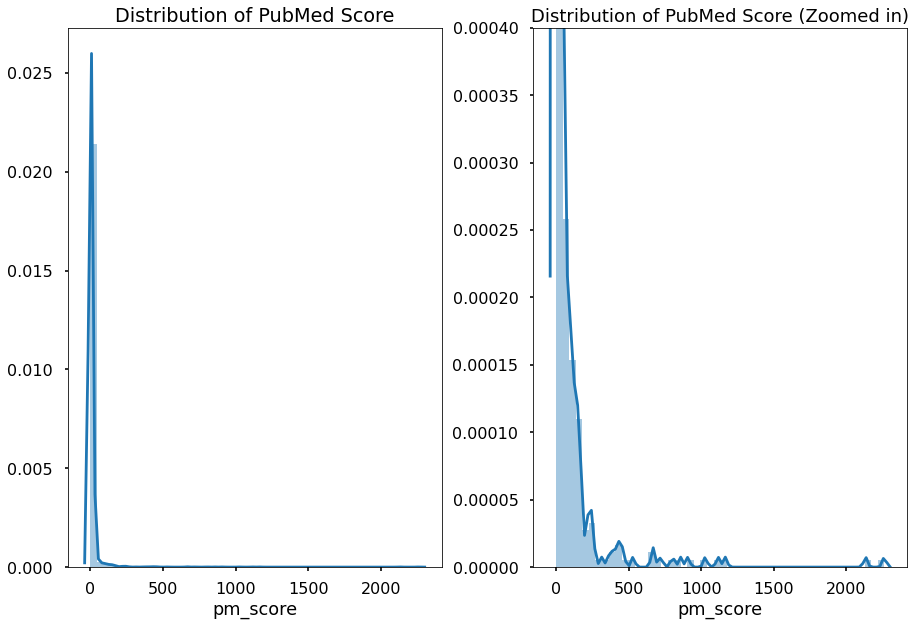

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.distplot(pm_proteins.pm_score, ax=ax[0])

sns.distplot(pm_proteins.pm_score, ax=ax[1])

ax[0].set_title('Distribution of PubMed Score')
ax[1].set_ylim(0,0.0004)
ax[1].set_title('Distribution of PubMed Score (Zoomed in)', fontsize=18)
plt.tight_layout()

# Gene RIF

In [14]:
proteins = {}
generif_group = generif.groupby(['protein_id'])

for name, group in generif_group:
    proteins[name] = len(group)

generif_df = targets[targets.id.isin(proteins.keys())]
generif_df['rif'] = proteins.values()

/home/jbofill/anaconda3/envs/pharos/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


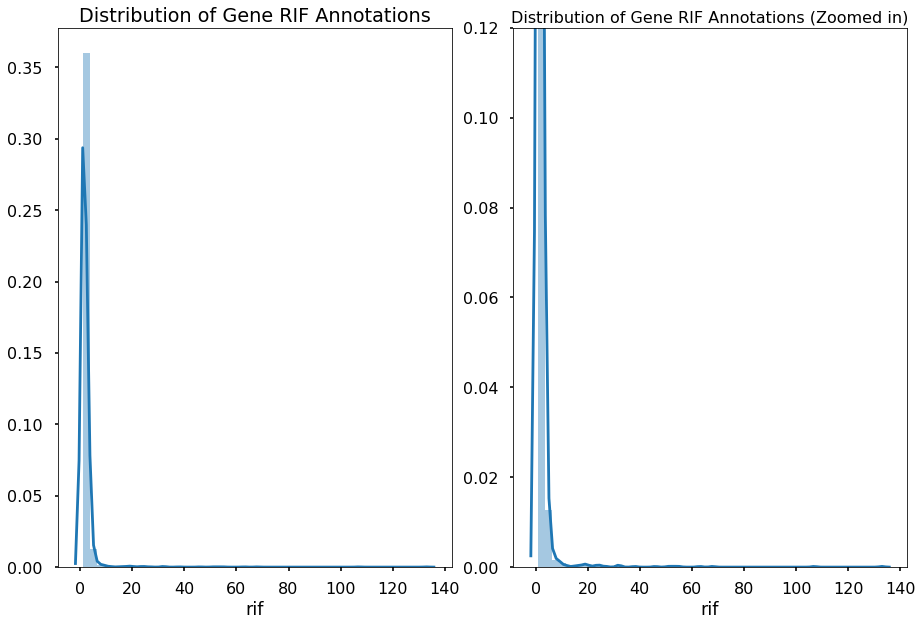

In [15]:
fig, ax = plt.subplots(nrows=1, ncols=2)

sns.distplot(generif_df.rif, ax=ax[0])

sns.distplot(generif_df.rif, ax=ax[1])

ax[0].set_title('Distribution of Gene RIF Annotations')
ax[1].set_ylim(0,0.12)
ax[1].set_title('Distribution of Gene RIF Annotations (Zoomed in)', fontsize=16)
plt.tight_layout()

# Tdark Proteins on the verge of becoming Tbio

In [16]:
proteins_with_data = targets[(targets['id'].isin(generif['protein_id'])) & (targets['id'].isin(pm_scores['protein_id']))]

proteins_with_data['generif'] = generif_df.rif
proteins_with_data['pm_score'] = pm_proteins.pm_score

proteins_with_data

/home/jbofill/anaconda3/envs/pharos/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/jbofill/anaconda3/envs/pharos/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


,id,name,ttype,description,comment,tdl,idg,fam,famext,ab_count,generif,pm_score
2,5,Uncharacterized protein C8orf76,Single Protein,None,None,Tdark,0,None,None,68,1,0.944444
3,10,Cyclic nucleotide-binding domain-containing pr...,Single Protein,None,None,Tdark,0,None,None,23,2,0.443723
5,12,Catechol O-methyltransferase domain-containing...,Single Protein,None,None,Tdark,0,Enzyme,methyltransferase_superfamily,78,1,2.840909
8,26,Consortin,Single Protein,None,None,Tdark,0,None,None,16,2,62.047292
16,57,Cytochrome P450 20A1,Single Protein,None,None,Tdark,0,None,None,246,1,4.560529
...,...,...,...,...,...,...,...,...,...,...,...,...
6352,20305,Mitotic-spindle organizing protein 2B,Single Protein,None,None,Tdark,0,None,None,13,2,0.111111
6355,20326,Neuralized-like protein 2,Single Protein,None,None,Tdark,0,None,None,81,1,3.139980
6359,20351,Myomesin-3,Single Protein,None,None,Tdark,0,None,None,60,3,3.842426
6360,20353,Nascent polypeptide-associated complex subunit...,Single Protein,None,None,Tdark,0,None,None,44,3,66.283636


In [17]:
ripe_proteins = proteins_with_data[(proteins_with_data.ab_count >= 40) & (proteins_with_data.generif >= 2) & (proteins_with_data.pm_score >= 4)]

ripe_proteins.sort_values(['ab_count', 'generif', 'pm_score'], ascending=False, inplace=True)

ripe_proteins

/home/jbofill/anaconda3/envs/pharos/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,id,name,ttype,description,comment,tdl,idg,fam,famext,ab_count,generif,pm_score
2038,6784,Interleukin-17 receptor E,Single Protein,None,None,Tdark,0,None,None,296,3,4.972698
262,897,PDZ domain-containing protein GIPC2,Single Protein,None,None,Tdark,0,None,None,229,2,4.164536
1547,4877,E3 ubiquitin-protein ligase TRIM4,Single Protein,None,None,Tdark,0,Enzyme,None,201,2,4.580185
1643,5205,TRAF-type zinc finger domain-containing protein 1,Single Protein,None,None,Tdark,0,None,None,194,2,4.321934
2069,6929,NF-kappa-B inhibitor-interacting Ras-like prot...,Single Protein,None,None,Tdark,0,Enzyme,small GTPase,191,3,4.872149
...,...,...,...,...,...,...,...,...,...,...,...,...
1141,3487,Ras GTPase-activating protein 2,Single Protein,None,None,Tdark,0,Enzyme,GTPase,40,3,10.491810
1728,5564,Immunoglobulin-like domain-containing receptor 2,Single Protein,None,None,Tdark,0,None,None,40,3,6.397854
1120,3413,Rab-like protein 2B,Single Protein,None,None,Tdark,0,Enzyme,small GTPase,40,3,4.308440
3212,10212,Retinoic acid-induced protein 2,Single Protein,None,None,Tdark,0,None,None,40,2,16.255495


# Proteins Close to Moving up a Level by PubMed Score

In [18]:
by_pm = ripe_proteins[(ripe_proteins['ab_count'] >= 50) & (ripe_proteins['generif'] >= 3) & (ripe_proteins['pm_score'] > 3)].sort_values('pm_score', ascending=False)

by_pm

,id,name,ttype,description,comment,tdl,idg,fam,famext,ab_count,generif,pm_score
6045,19073,Protein phosphatase 1 regulatory subunit 12C,Single Protein,None,None,Tdark,0,Enzyme,phosphatase,50,3,149.119301
3646,11770,Muscular LMNA-interacting protein,Single Protein,None,None,Tdark,0,None,None,50,3,31.855352
4050,12991,C1q-related factor,Single Protein,None,None,Tdark,0,None,None,50,3,5.216200
2038,6784,Interleukin-17 receptor E,Single Protein,None,None,Tdark,0,None,None,296,3,4.972698
906,2706,Deuterosome assembly protein 1,Single Protein,None,None,Tdark,0,None,None,83,3,4.960696
949,2865,Glutathione-specific gamma-glutamylcyclotransf...,Single Protein,None,None,Tdark,0,Enzyme,gamma-glutamyltransferase,106,3,4.905870
5017,15631,"Arf-GAP with coiled-coil, ANK repeat and PH do...",Single Protein,None,None,Tdark,0,None,None,116,3,4.874874
2069,6929,NF-kappa-B inhibitor-interacting Ras-like prot...,Single Protein,None,None,Tdark,0,Enzyme,small GTPase,191,3,4.872149
1622,5144,Spermatogenesis-associated protein 17,Single Protein,None,None,Tdark,0,None,None,55,3,4.805494
3125,9854,Phospholipid phosphatase 2,Single Protein,None,None,Tdark,0,Enzyme,phosphatase,150,3,4.782738


# By Gene RIF

In [19]:
by_rif = ripe_proteins[(ripe_proteins['ab_count'] >= 50) & (ripe_proteins['generif'] == 2) & (ripe_proteins['pm_score'] >= 5)].sort_values('generif', ascending=False)

by_rif

,id,name,ttype,description,comment,tdl,idg,fam,famext,ab_count,generif,pm_score
4074,13043,Coiled-coil domain-containing protein 85B,Single Protein,None,None,Tdark,0,None,None,50,2,67.840049
4564,14654,Protein YIPF6,Single Protein,None,None,Tdark,0,None,None,50,2,13.372814
6241,19751,"Transcription termination factor 3, mitochondrial",Single Protein,None,None,Tdark,0,None,None,50,2,12.224113
3858,12466,Leucine-rich repeat-containing protein 10,Single Protein,None,None,Tdark,0,None,None,50,2,10.766884
1863,6148,HD domain-containing protein 2,Single Protein,None,None,Tdark,0,None,None,50,2,8.408333


# By Antibody Count

In [20]:
by_ab = ripe_proteins[((ripe_proteins['ab_count'] >= 40) & (ripe_proteins['ab_count'] < 50)) & (ripe_proteins['generif'] >= 3) & (ripe_proteins['pm_score'] >= 5)].sort_values('ab_count', ascending=False)

by_ab

,id,name,ttype,description,comment,tdl,idg,fam,famext,ab_count,generif,pm_score
1285,3966,Prolactin-releasing peptide,Single Protein,None,None,Tdark,0,None,None,49,3,151.627372
1042,3104,Beta-crystallin A2,Single Protein,None,None,Tdark,0,None,None,49,3,8.229723
5064,15890,Alpha-protein kinase 3,Single Protein,None,None,Tdark,1,Kinase,None,49,3,7.544842
5534,17609,Heparan-sulfate 6-O-sulfotransferase 3,Single Protein,None,None,Tdark,0,Enzyme,sulfotransferase_6,49,3,5.265381
64,194,Coiled-coil-helix-coiled-coil-helix domain-con...,Single Protein,None,None,Tdark,0,None,None,49,3,19.580249
2800,9022,Tuberoinfundibular peptide of 39 residues,Single Protein,None,None,Tdark,0,None,None,48,3,41.940683
248,836,G patch domain-containing protein 2,Single Protein,None,None,Tdark,0,None,None,48,3,17.148632
5326,16961,Uncharacterized protein C11orf95,Single Protein,None,None,Tdark,0,TF,TF,47,3,5.929836
5372,17100,Protein ATP1B4,Single Protein,None,None,Tdark,0,Transporter,cation_transport_ATPase_P-type,46,3,90.956355
1817,5951,Histone H1t,Single Protein,None,None,Tdark,0,None,None,46,3,90.334116


<AxesSubplot:>

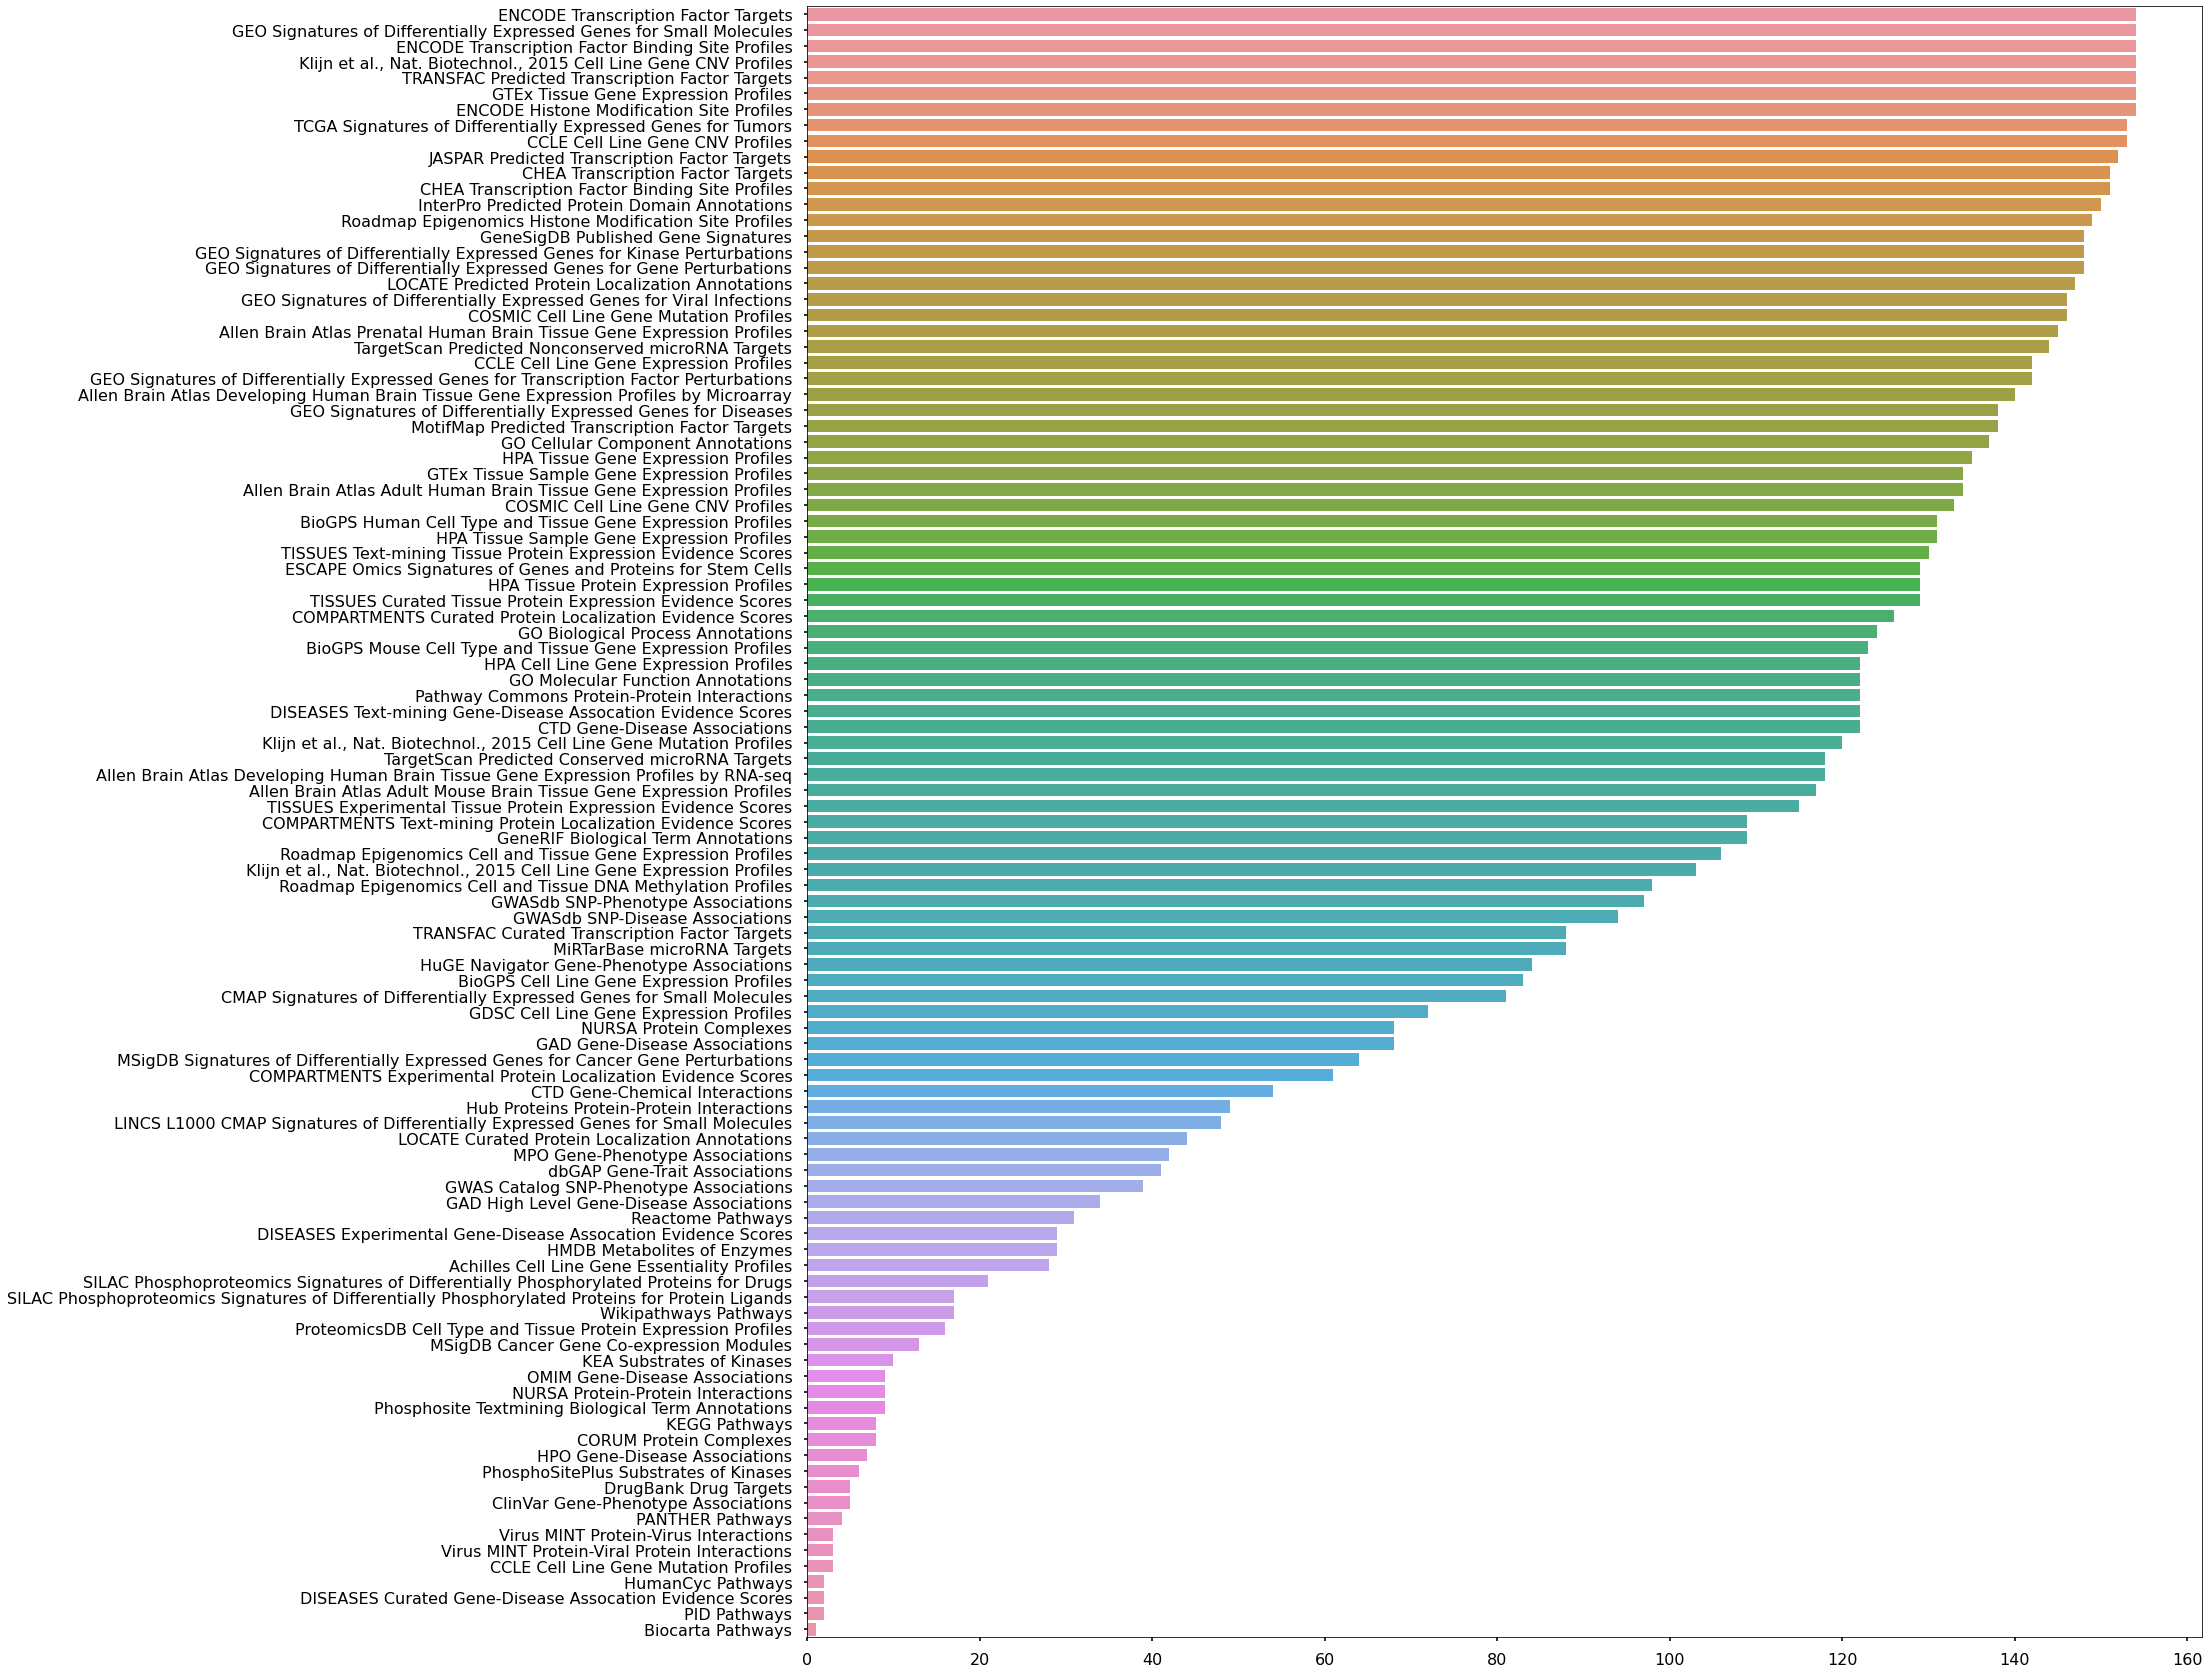

In [21]:
hgram_ripe = hgram[hgram['protein_id'].isin(ripe_proteins['id'])]

type_counts = hgram_ripe['type'].value_counts().sort_values(ascending=False)

top40 = type_counts
plt.figure(figsize=(25,30))
sns.barplot(y=top40.keys(), x=top40.values)

<AxesSubplot:>

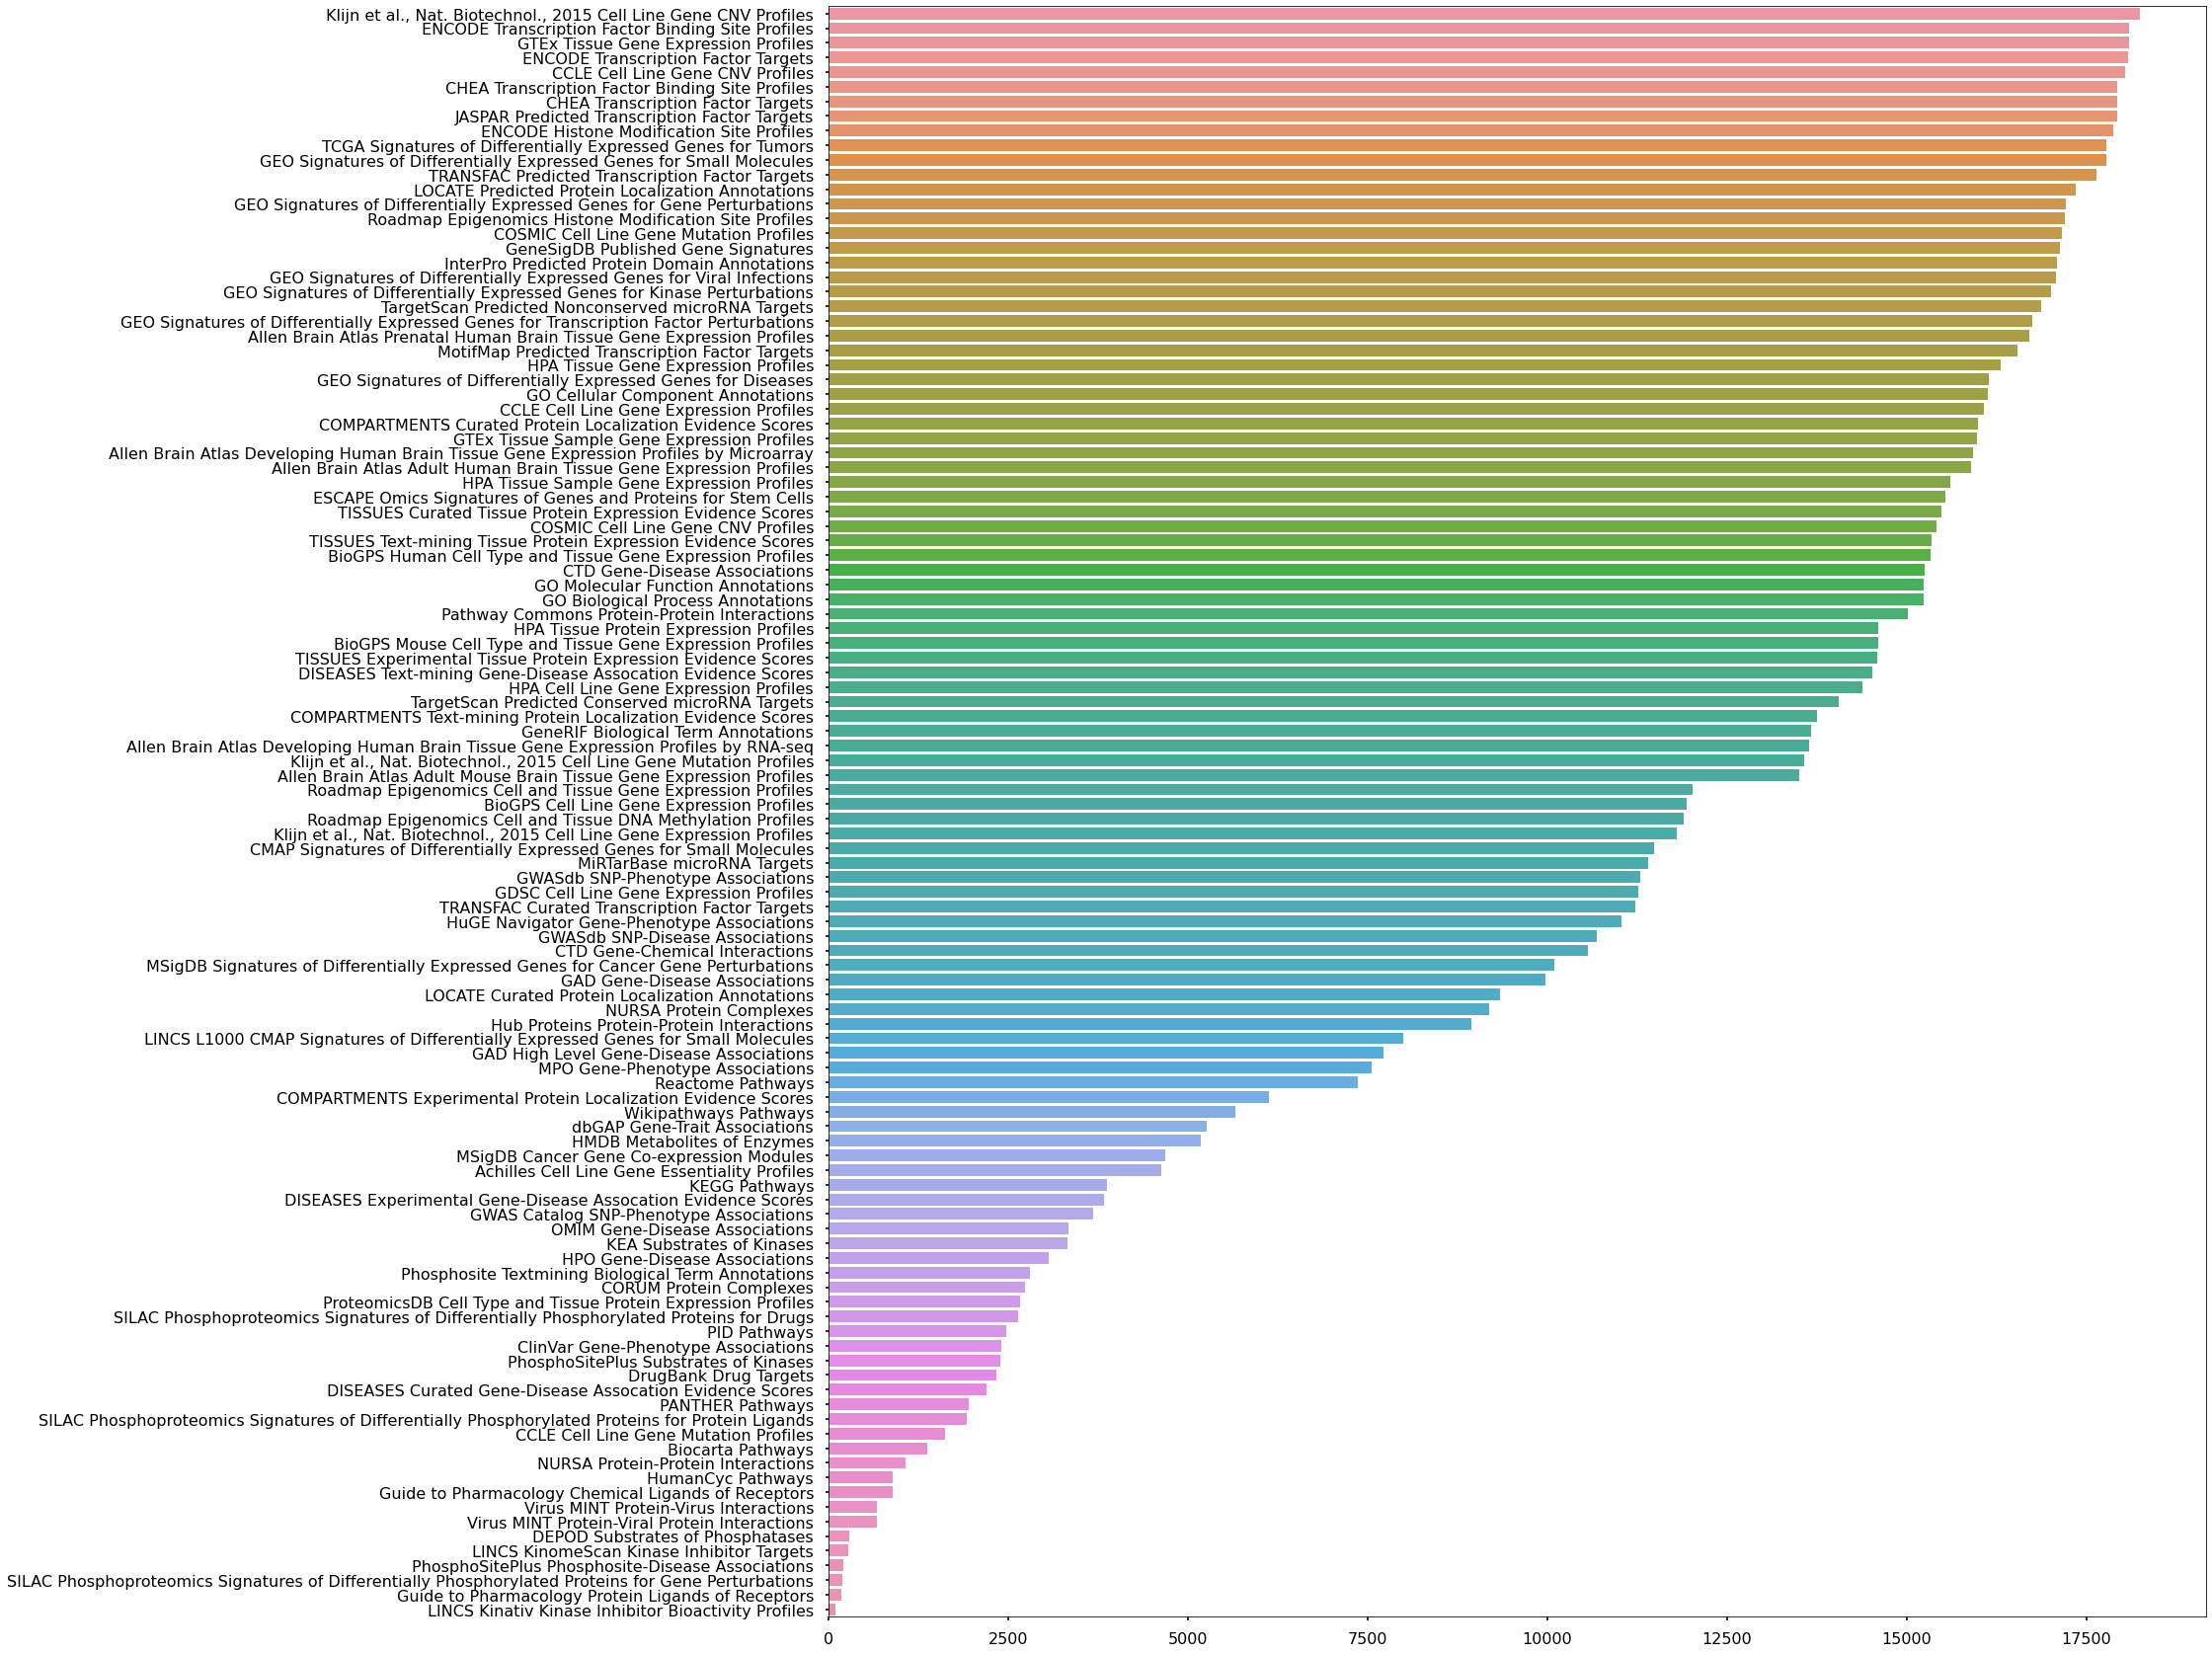

In [22]:
non_ripe_tdark = hgram[~hgram['protein_id'].isin(ripe_proteins['id'])]
type_count_not_ripe = non_ripe_tdark['type'].value_counts().sort_values(ascending=False)

top50 = type_count_not_ripe.head(50)
plt.figure(figsize=(25,30))
sns.barplot(y=type_count_not_ripe.keys(), x=type_count_not_ripe.values)

The actual shapes of the histrograms look similar, but the positions of different sources are not identical.
In proteins that are "ripe" for obtaining a new level from t-dark